In [1]:
# Import all the necessary libraries.
import numpy as np
import timeit
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import LeavePOut

In [2]:
# Definiton of the function that creates the data set.
def genDataSet(N, seed):
    # Reset PN generator.
    np.random.seed(seed)
    # Attribute.
    x = np.linspace(-6, 6, N).reshape(N, 1)
    # Fifth order target function.
    y = 2.33*x**5 + 5.3*x**4 - 3.2*x**3 + 0.5*x**2 - x + 2
    # Noise.
    w = np.random.randn(N, 1)
    # Observable function.
    y_noisy = y + w
    # Return arrays.
    return x, y_noisy, y

## Generate the dataset.

In [3]:
# Define number of samples.
N = 100

# Reset pseudo random generator.
seed = 6

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

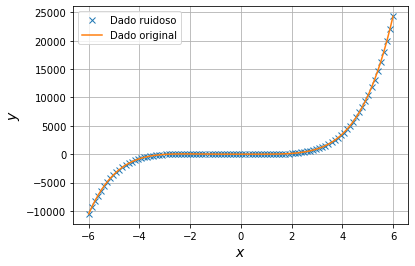

In [4]:
# Plot original data versus noisy version.
fig = plt.figure()
plt.plot(x, y_noisy, 'x', label='Dado ruidoso')
plt.plot(x, y, label='Dado original')
plt.xlabel('$x$', fontsize=14)
plt.ylabel('$y$', fontsize=14)
plt.legend()
plt.grid()
#Show the plot.
plt.show()

## Holdout with different split sizes and Shuffle=True

Exemplo utilizando um polinômio de ordem 5.

In [5]:
mse_val = []
mse_train = []

splits = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for split in splits:
    # Split the whole set into random training and validation set.
    x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=split, shuffle=True, random_state=seed)

    print('Training set size:', len(y_train))
    print('Validation set size:', len(y_val))
    
    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=5, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    poly_reg.fit(x_train, y_train)

    y_train_predict = poly_reg.predict(x_train)

    y_val_predict = poly_reg.predict(x_val)

    mse_val.append(mean_squared_error(y_val, y_val_predict))

    mse_train.append(mean_squared_error(y_train, y_train_predict))

Training set size: 90
Validation set size: 10
Training set size: 80
Validation set size: 20
Training set size: 70
Validation set size: 30
Training set size: 60
Validation set size: 40
Training set size: 50
Validation set size: 50
Training set size: 40
Validation set size: 60
Training set size: 30
Validation set size: 70
Training set size: 20
Validation set size: 80
Training set size: 10
Validation set size: 90


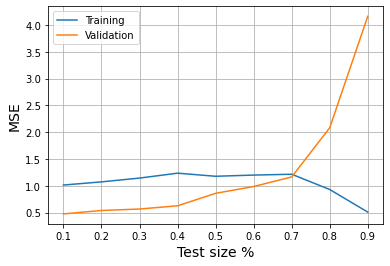

In [6]:
plt.figure()
plt.plot(splits, mse_train, label='Training')
plt.plot(splits, mse_val, label='Validation')
plt.ylabel('MSE', fontsize=14)
plt.xlabel('Test size %', fontsize=14)
plt.xticks(splits)
#plt.yscale('log')
plt.grid()
plt.legend()
plt.show()

Com um conjunto de 100 exemplos e esta semente (vai depender da semente como veremos a seguir) vemos que os erros de treinamento e validação aumentam com a diminuição do conjunto de treinamento até um ponto (0.7) onde o modelo começa a **sobreajustar** aos dados de treinamento e os erros divergem, com o erro de treinamento diminuindo e o de validação aumentando rapidamente.

## Comparing Holdout with shuffle True and False
 
### Variable test size and shuffle = True

Exemplo utilizando um polinômio de ordem 5.

In [7]:
mse_val_shuffle_on = []
mse_train_shuffle_on = []

testSizes = [0.1, 0.3, 0.5, 0.7, 0.9, 0.95]

for inc in range(0, len(testSizes)):
    
    tsize = testSizes[inc]
    
    mse_val_shuffle_on.append([])
    mse_train_shuffle_on.append([])
    
    for seedvar in range(0, 500):
        # Split the whole set into random training and validation set.
        x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        poly_reg.fit(x_train, y_train)

        y_train_predict = poly_reg.predict(x_train)

        y_val_predict = poly_reg.predict(x_val)

        mse_val_shuffle_on[inc].append(mean_squared_error(y_val, y_val_predict))

        mse_train_shuffle_on[inc].append(mean_squared_error(y_train, y_train_predict))

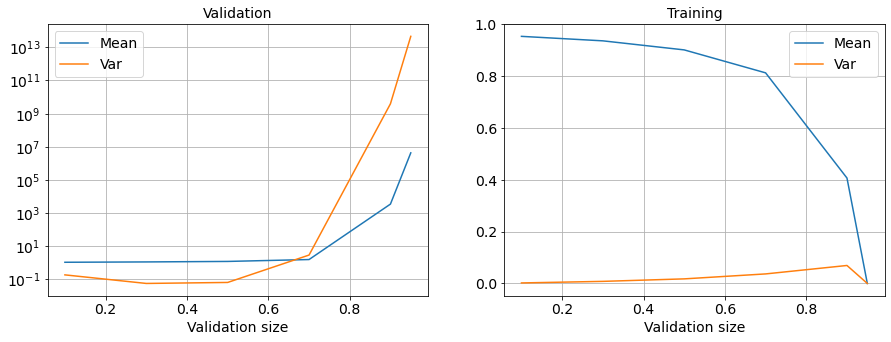

In [8]:
# Calculo da média e variância do MSE de validação para diferentes sementes.
mse_mean_val = np.zeros((len(testSizes),))
var_mean_val = np.zeros((len(testSizes),))
for k in range(0,len(testSizes)):
    mse_mean_val[k] = np.mean(mse_val_shuffle_on[k])
    var_mean_val[k] = np.var(mse_val_shuffle_on[k])

# Calculo da média e variância do MSE de treinamento para diferentes sementes.
mse_mean_train = np.zeros((len(testSizes),))
var_mean_train = np.zeros((len(testSizes),))
for k in range(0,len(testSizes)):
    mse_mean_train[k] = np.mean(mse_train_shuffle_on[k])
    var_mean_train[k] = np.var(mse_train_shuffle_on[k])

plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 2, 1)
plt.plot
plt.plot(testSizes, mse_mean_val, label='Mean')
plt.plot(testSizes, var_mean_val, label='Var')
plt.title('Validation', fontsize=14)
plt.xlabel('Validation size', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')

ax = plt.subplot(1, 2, 2)
plt.plot(testSizes, mse_mean_train, label='Mean')
plt.plot(testSizes, var_mean_train, label='Var')
plt.title('Training', fontsize=14)
plt.xlabel('Validation size', fontsize=14)
plt.grid()
plt.legend(fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Validation:
test size = 0.10: MSE mean: 1.0549 - MSE var: 0.1828
test size = 0.30: MSE mean: 1.1058 - MSE var: 0.0555
test size = 0.50: MSE mean: 1.1850 - MSE var: 0.0638
test size = 0.70: MSE mean: 1.5411 - MSE var: 2.8756
test size = 0.90: MSE mean: 3431.7770 - MSE var: 3899096642.7146
test size = 0.95: MSE mean: 4262028.4519 - MSE var: 46137843187797.8750

Training:
test size = 0.10: MSE mean: 0.9537 - MSE var: 0.0020
test size = 0.30: MSE mean: 0.9364 - MSE var: 0.0080
test size = 0.50: MSE mean: 0.9014 - MSE var: 0.0176
test size = 0.70: MSE mean: 0.8128 - MSE var: 0.0368
test size = 0.90: MSE mean: 0.4068 - MSE var: 0.0693
test size = 0.95: MSE mean: 0.0000 - MSE var: 0.0000


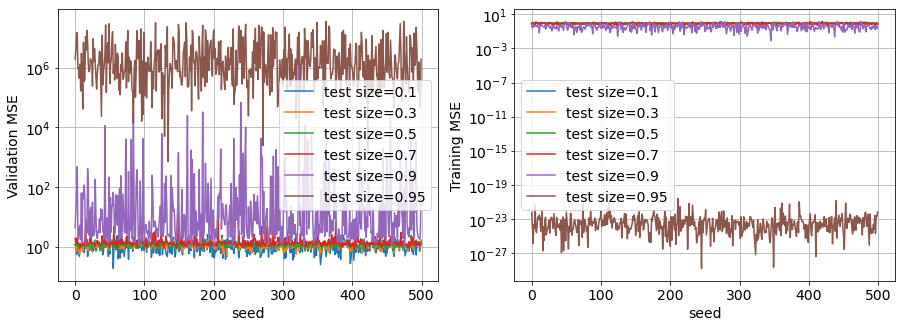

In [9]:
plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 2, 1)
print('Validation:')
for k in range(0,len(testSizes)):
    plt.plot(mse_val_shuffle_on[k], label='test size='+str(testSizes[k]))
    print('test size = %1.2f: MSE mean: %1.4f - MSE var: %1.4f' % (testSizes[k], np.mean(mse_val_shuffle_on[k]), np.var(mse_val_shuffle_on[k])))
plt.ylabel('Validation MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

print('\nTraining:')
ax = plt.subplot(1, 2, 2)
for k in range(0,len(testSizes)):
    plt.plot(mse_train_shuffle_on[k], label='test size='+str(testSizes[k]))
    print('test size = %1.2f: MSE mean: %1.4f - MSE var: %1.4f' % (testSizes[k], np.mean(mse_train_shuffle_on[k]), np.var(mse_train_shuffle_on[k])))
plt.ylabel('Training MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.yscale('log')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.grid()

plt.show()

#### MSE varia com a semente utilizada

Vejam que o **erro de validação** tem uma grande variação, principalmente para o caso onde o conjunto de treinamento é bem menor do que o conjunto de validação. Isso acontece pois o modelo começa a sobreajustar.

Podemos perceber que essa grande variação no **erro de validação** depende da semente utilizada na função de **split**, ou seja, o erro depende das amostras que foram escolhidas para fazer parte dos conjuntos de treinamento e validação, os quais precisam ser representativos do modelo gerador. 

Este exemplo, mostra o efeito conhecido como **viés de seleção**.

Além disso, este exemplo mostra o efeito da variação do tamanho do conjunto de treinamento. 

Vemos que os erros de validação e treinamento se distanciam do valor mínimo do MSE, 1, conforme o tamanho do conjunto de treinamento diminui e o de validação aumenta. 

Como o conjunto de treinamento diminui e, consequentemente, a probabilidade de se ter um conjunto representativo, a qualidade do modelo tende a piorar, resultando em um modelo que diverge da solução ótima (i.e., mapeamento verdadeiro) e apresenta alta variância.

### Variable test size and shuffle = False

Exemplo utilizando um polinômio de ordem 5.

In [10]:
mse_val_shuffle_off = []
mse_train_shuffle_off = []

testSizes = [0.1, 0.3, 0.5, 0.7, 0.9]

for inc in range(0, len(testSizes)):
    
    tsize = testSizes[inc]

    # Split the whole set into random training and validation set.
    x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=False)

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=5, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    poly_reg.fit(x_train, y_train)

    y_train_predict = poly_reg.predict(x_train)

    y_val_predict = poly_reg.predict(x_val)
    
    mse_val = mean_squared_error(y_val, y_val_predict)

    mse_val_shuffle_off.append(mse_val)

    mse_train = mean_squared_error(y_train, y_train_predict)
    
    mse_train_shuffle_off.append(mse_train)
    
    print('----- %1.1f -----' % (tsize))
    print('MSE train:', mse_train)
    print('MSE val:', mse_val)
    print('---------------------')

----- 0.1 -----
MSE train: 0.9826741576599632
MSE val: 0.7726993775406347
---------------------
----- 0.3 -----
MSE train: 0.9496220954238002
MSE val: 1015.739755220364
---------------------
----- 0.5 -----
MSE train: 0.9905535790650591
MSE val: 98745.95525707098
---------------------
----- 0.7 -----
MSE train: 1.033822009322818
MSE val: 57979156.33495766
---------------------
----- 0.9 -----
MSE train: 1.1164037936417839
MSE val: 66098386161037.125
---------------------


Validation:
MSE mean: 13219688847991.1855 - MSE var: 699039157381686626067939328.0000

Training:
MSE mean: 1.0146 - MSE var: 3.3106e-03


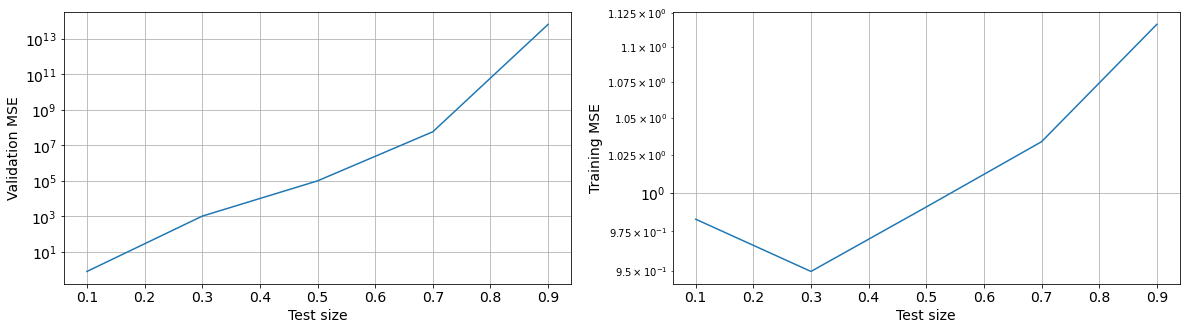

In [11]:
plt.figure(figsize=(20, 5))

print('Validation:')
print('MSE mean: %1.4f - MSE var: %1.4f' % (np.mean(mse_val_shuffle_off), np.var(mse_val_shuffle_off)))

ax = plt.subplot(1, 2, 1)
plt.plot(testSizes, mse_val_shuffle_off)
plt.ylabel('Validation MSE', fontsize=14)
plt.xlabel('Test size', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

print('\nTraining:')
print('MSE mean: %1.4f - MSE var: %1.4e' % (np.mean(mse_train_shuffle_off), np.var(mse_train_shuffle_off)))

ax = plt.subplot(1, 2, 2)
plt.plot(testSizes, mse_train_shuffle_off)
plt.ylabel('Training MSE', fontsize=14)
plt.xlabel('Test size', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

#### O não embaralhamento resulta em alto erro de validação.

Percebam que o **erro de validação** quando não há embaralhamento da base de dados antes da divisão é bem maior do que o erro de validação quando os dados são embaralhados antes da divisão. 

Isso acontece, nesse exemplo, devido ao fato de que sem embaralhamento, o conjunto de validação contém uma parte da base de dados que não foi utilizada durante o treinamento, ou seja, os conjunto de treinamento e validação não são representativos do modelo gerador. 

Em outras palavras, o conjunto de treinamento contém amostras de uma região da curva que não estão no conjunto de validação. 

Lembre-se que ambos conjuntos devem ser representativos com relação ao modelo gerador.

##  k-Fold with variation of k and random seed

In [12]:
N = 100

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

In [13]:
kfold_mean_vec = []
kfold_std_vec = []
idx = 0
splits = [2, 6, 10]
for k in splits:
    
    kfold_mean_vec.append([])
    kfold_std_vec.append([])
    
    for seedvar in range(0, 500):
        # Instantiate the k-Fold object.
        kfold = KFold(n_splits=k, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        lin_scores = cross_val_score(poly_reg, x, y_noisy, scoring='neg_mean_squared_error', cv=kfold)

        scores = -lin_scores
        kfold_mean_vec[idx].append(scores.mean())
        kfold_std_vec[idx].append(scores.std())
    idx += 1

k = 2: MSE mean: 1.1889 - MSE var: 0.0273
k = 6: MSE mean: 1.1006 - MSE var: 0.0017
k = 10: MSE mean: 1.0921 - MSE var: 0.0008


k = 2: STD DEV mean: 0.1224 - STD DEV var:0.0127
k = 6: STD DEV mean: 0.3182 - STD DEV var:0.0092
k = 10: STD DEV mean: 0.4324 - STD DEV var:0.0091


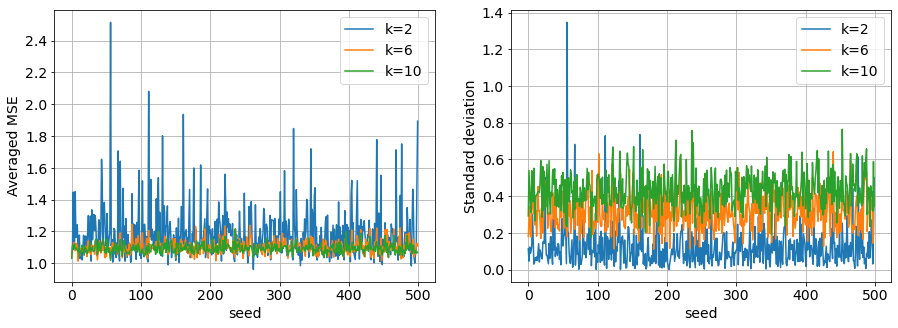

In [14]:
plt.figure(figsize=(15, 5))

ax = plt.subplot(1, 2, 1)
for k in range(0,len(splits)):
    plt.plot(kfold_mean_vec[k], label='k='+str(splits[k]))
    print('k = %d: MSE mean: %1.4f - MSE var: %1.4f' % (splits[k], np.mean(kfold_mean_vec[k]), np.var(kfold_mean_vec[k])))
plt.ylabel('Averaged MSE', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

print('\n')
ax = plt.subplot(1, 2, 2)
for k in range(0,len(splits)):
    plt.plot(kfold_std_vec[k], label='k='+str(splits[k]))
    print('k = %d: STD DEV mean: %1.4f - STD DEV var:%1.4f' % (splits[k], np.mean(kfold_std_vec[k]), np.var(kfold_std_vec[k])))
plt.ylabel('Standard deviation', fontsize=14)
plt.xlabel('seed', fontsize=14)
plt.legend(fontsize=14)
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Vemos que conforme k aumenta, o MSE tende a 1, o menor valor possível, e que a variância do MSE diminui.

A média do desvio padrão tende a aumentar com k, pois o número de amostras do conjunto de validação diminui, porém, assim como com a variância do MSE, a variância do desvio padrão diminui com o aumento de k.

## Comparison between Holdout and k-Fold

Para uma comparação mais justa, escolhemos `k` e `testsize` para que os conjuntos tenham aproximadamente o mesmo número de amostras

In [15]:
N = 100

# Generate data set.
x, y_noisy, y = genDataSet(N, seed)

### Holdout

In [ ]:
ho_mse_val_shuffle_on = []
ho_mse_train_shuffle_on = []

testSizes = [0.5, 0.3, 0.2, 0.1]

for inc in range(0, len(testSizes)):
    
    tsize = testSizes[inc]
    
    ho_mse_val_shuffle_on.append([])
    ho_mse_train_shuffle_on.append([])
    
    for seedvar in range(0,500):
        # Split the whole set into random training and validation set.
        x_train, x_val, y_train, y_val = train_test_split(x, y_noisy, test_size=tsize, shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        poly_reg.fit(x_train, y_train)

        y_train_predict = poly_reg.predict(x_train)

        y_val_predict = poly_reg.predict(x_val)

        ho_mse_val_shuffle_on[inc].append(mean_squared_error(y_val, y_val_predict))

        ho_mse_train_shuffle_on[inc].append(mean_squared_error(y_train, y_train_predict))

### k-Fold

In [ ]:
kfold_mse_shuffle_on = []
kfold_std_shuffle_on = []
splits = [2, 3, 5, 10]
for idx in range(0, len(splits)):
    
    kfold_mse_shuffle_on.append([])
    kfold_std_shuffle_on.append([])
    
    for seedvar in range(0, 500):
        # Instantiate the k-Fold object.
        kfold = KFold(n_splits=splits[idx], shuffle=True, random_state=seedvar)

        # Instantiate a polynomial.
        poly = PolynomialFeatures(degree=5, include_bias=True)
        # Instantiate a scaler.
        scaler = StandardScaler()
        # Instantiate a linear regressor.
        reg = LinearRegression()

        # Create a pipeline of actions.
        poly_reg = Pipeline([
            ("poly", poly),
            ("scaler", scaler),
            ("reg", reg),
        ])

        lin_scores = cross_val_score(poly_reg, x, y_noisy, scoring='neg_mean_squared_error', cv=kfold)

        scores = -lin_scores
        kfold_mse_shuffle_on[idx].append(scores.mean())
        kfold_std_shuffle_on[idx].append(scores.std())

In [ ]:
plt.figure(figsize=(20, 5))

for k in range(0,len(splits)):
    
    print('k = %1.1f: MSE mean: %1.4f - MSE var: %1.4f' % (splits[k], np.mean(kfold_mse_shuffle_on[k]), np.var(kfold_mse_shuffle_on[k])))
    print('t = %0.1f: MSE mean: %1.4f - MSE var: %1.4f\n' % (testSizes[k], np.mean(ho_mse_val_shuffle_on[k]), np.var(ho_mse_val_shuffle_on[k])))
    
    ax = plt.subplot(1, len(splits), k+1)
    plt.plot(ho_mse_val_shuffle_on[k], label='Holdout test size='+str(testSizes[k]))
    plt.plot(kfold_mse_shuffle_on[k], label='k-Fold k='+str(splits[k]))
    plt.ylabel('MSE')
    plt.xlabel('seed')
    plt.grid()
    plt.legend()

plt.show()

Como nós podemos ver, o k-Fold apresenta menor variação do erro em relação à mudança da semente, isto se torna mais evidente conforme k aumenta.

Como consequência de uma menor variação do erro o k-Fold apresenta menor variância do erro, o que corresponde a uma menor dependência de como os conjuntos de treinamento e validação foram criados (ou seja, a forma como o k-Fold funciona faz com que os conjuntos sejam mais representativos do que os conjuntos criados com a estratégia do Holdout).

## Leave-P-Out

In [ ]:
lpo_mse = []
lpo_std = []

psizes = [1, 2, 3]

for inc in range(0, len(psizes)):

    lpocv = LeavePOut(p=psizes[inc])

    # Instantiate a polynomial.
    poly = PolynomialFeatures(degree=5, include_bias=True)
    # Instantiate a scaler.
    scaler = StandardScaler()
    # Instantiate a linear regressor.
    reg = LinearRegression()

    # Create a pipeline of actions.
    poly_reg = Pipeline([
        ("poly", poly),
        ("scaler", scaler),
        ("reg", reg),
    ])

    lin_scores = cross_val_score(poly_reg, x, y_noisy, scoring='neg_mean_squared_error', cv=lpocv)
        
    scores = -lin_scores
    lpo_mse.append(scores.mean())
    lpo_std.append(scores.std())        

In [ ]:
# Plot results.
plt.figure(figsize=(15, 5))
ax = plt.subplot(1, 2, 1)
plt.plot(psizes, lpo_mse, label='Erro quadrático médio')
plt.xlabel('p', fontsize=14)
plt.ylabel('Média do erro quadrático médio', fontsize=14)
plt.xticks(psizes)
plt.legend()
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax = plt.subplot(1, 2, 2)
plt.plot(psizes, lpo_std, label='Desvio padrão do erro')
plt.xlabel('p', fontsize=14)
plt.ylabel('Desvio padrão', fontsize=14)
plt.xticks(psizes)
plt.legend()
plt.grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#Show the plot.
plt.show()